In [1]:
from binance.client import Client
from Indicators.createAdx import CreateAdx
from Indicators.createIndicator import Indicators
from history.retrieve import RetrieveHistory
from services.rest import BinanceRest
from services.setup import ClientSetup
from utils.constants import AppConstants
import pandas as pd

In [2]:
symbol = "XRPUSDT"
interval = Client.KLINE_INTERVAL_1MINUTE
client = ClientSetup(AppConstants.ENV_TEST).setup()
history = RetrieveHistory(symbol, interval, client)
data = history.get_historical_klines("6 hours ago UTC")
df = history.set_panda_dataFrame(data)

In [3]:
df

,Open,High,Low,Close,Volume,Number Of Trades
Open Time,,,,,,
2020-08-10 17:46:00,0.29229,0.29260,0.29220,0.29253,168676.4,120
2020-08-10 17:47:00,0.29263,0.29266,0.29254,0.29258,27722.3,37
2020-08-10 17:48:00,0.29257,0.29260,0.29247,0.29260,23515.9,27
2020-08-10 17:49:00,0.29265,0.29274,0.29251,0.29267,75725.1,54
2020-08-10 17:50:00,0.29270,0.29310,0.29266,0.29303,77599.0,92
...,...,...,...,...,...,...
2020-08-10 23:41:00,0.30144,0.30145,0.30111,0.30114,94884.7,95
2020-08-10 23:42:00,0.30110,0.30132,0.30083,0.30094,149689.2,102
2020-08-10 23:43:00,0.30094,0.30097,0.30030,0.30078,121888.7,112


In [4]:
indicators = Indicators(df)
df = indicators.set_bb(20,2,'Close')
df



,Open,High,Low,Close,Volume,Number Of Trades,20MAClose,20STDClose,20UpperBandClose,20LowerBandClose
Open Time,,,,,,,,,,
2020-08-10 17:46:00,0.29229,0.29260,0.29220,0.29253,168676.4,120,NaN,NaN,NaN,NaN
2020-08-10 17:47:00,0.29263,0.29266,0.29254,0.29258,27722.3,37,NaN,NaN,NaN,NaN
2020-08-10 17:48:00,0.29257,0.29260,0.29247,0.29260,23515.9,27,NaN,NaN,NaN,NaN
2020-08-10 17:49:00,0.29265,0.29274,0.29251,0.29267,75725.1,54,NaN,NaN,NaN,NaN
2020-08-10 17:50:00,0.29270,0.29310,0.29266,0.29303,77599.0,92,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-08-10 23:41:00,0.30144,0.30145,0.30111,0.30114,94884.7,95,0.301660,0.000803,0.303266,0.300055
2020-08-10 23:42:00,0.30110,0.30132,0.30083,0.30094,149689.2,102,0.301568,0.000772,0.303111,0.300025
2020-08-10 23:43:00,0.30094,0.30097,0.30030,0.30078,121888.7,112,0.301468,0.000735,0.302938,0.299998


In [5]:
# retrieve certain index
df.loc['2020-08-10 23:00:00']

Open                     0.302070
High                     0.302710
Low                      0.301820
Close                    0.302560
Volume              461587.300000
Number Of Trades       197.000000
20MAClose                0.303197
20STDClose               0.000409
20UpperBandClose         0.304015
20LowerBandClose         0.302379
Name: 2020-08-10 23:00:00, dtype: float64

<AxesSubplot:xlabel='Open Time'>

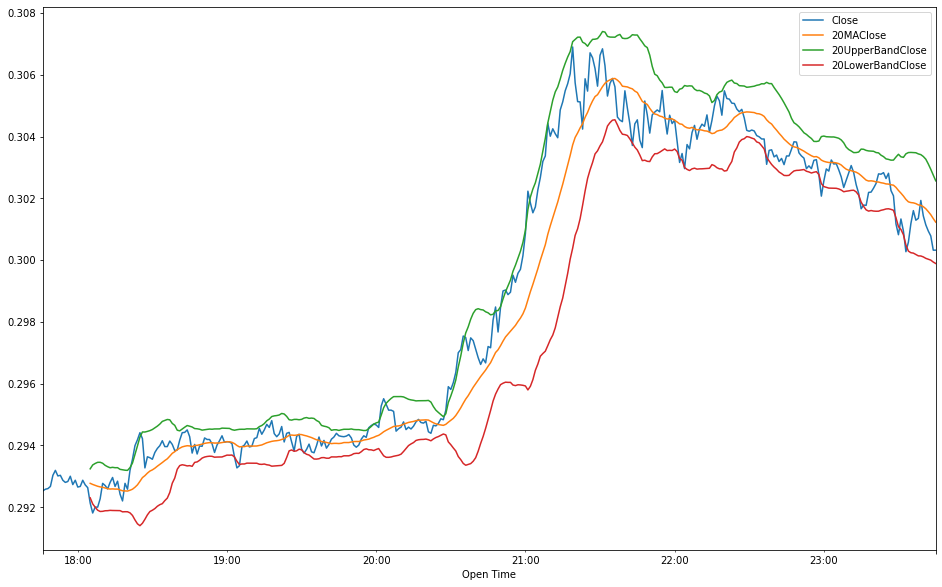

In [6]:
# plot bb
df[['Close','20MAClose','20UpperBandClose','20LowerBandClose']].plot(figsize=(16,10))

<AxesSubplot:xlabel='Open Time'>

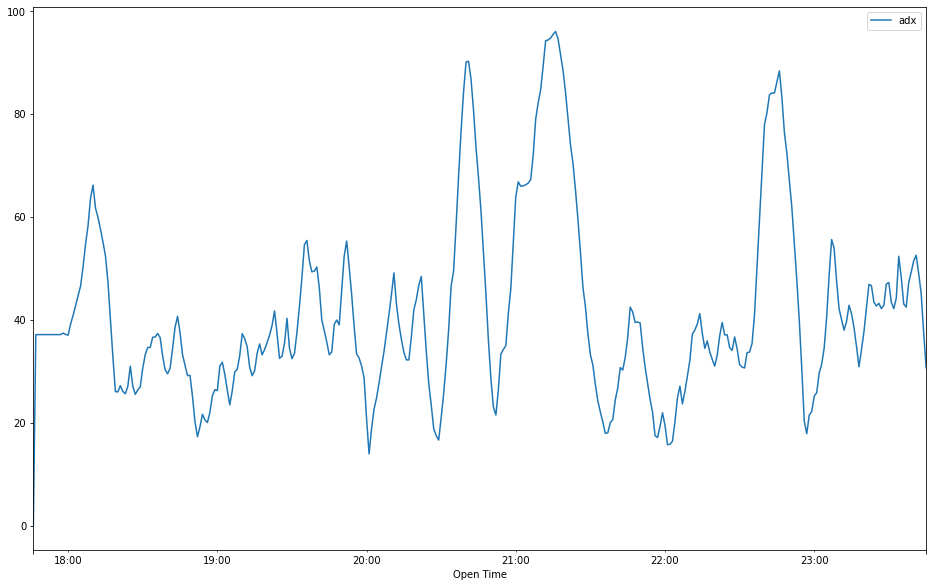

In [7]:
adx = CreateAdx(df,10) 
df['adx'] = adx.adx
df['pDIs'] = adx.pDIs
df['nDIs'] = adx.nDIs

df[['adx','pDIs','nDIs']].plot(figsize=(16,10))
